In [1]:
import sys

sys.path.insert(
    1, "..\\utilities\\"
)  # adds utilities folder to path so we can import modules from it, won't be needed after packaging

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import loading_utils as load

In [3]:
data_dir = "./results"

for file in os.listdir(data_dir):
    if file.endswith("full_data.csv"):
        path_to_file = os.path.join(data_dir, file)
        participant_df = pd.read_csv(path_to_file)
        transition_times = []
        for session in participant_df["Session id"].unique():
            session_df = participant_df[participant_df["Session id"] == session]
            transition_times_per_sess = [
                len(
                    session_df[
                        (session_df["Sequence index"] == i)
                        & (session_df["Experiment state"] == "Passive")
                    ]
                )
                for i in session_df["Sequence index"].unique()
            ]
            transition_times.append(transition_times_per_sess)
            transition_times_per_sess = []
        transition_times_flat = sum(transition_times, [])
        max_time = np.max(transition_times_flat)
        min_time = np.min(transition_times_flat)
        mean_time = np.mean(transition_times_flat)
        std_time = np.std(transition_times_flat)
        participant_df = []
        print(f"Statistics of passive time in samples for participant {file[0:3]}")
        print(f"max: {max_time}, min: {min_time}, mean: {mean_time}, stdev: {std_time}")

Statistics of transition time in samples for participant 200
max: 11, min: 0, mean: 7.874587458745874, stdev: 2.02560696476002
Statistics of transition time in samples for participant 201
max: 11, min: 0, mean: 7.886446886446887, stdev: 1.966272252136838
Statistics of transition time in samples for participant 202
max: 11, min: 0, mean: 7.917065390749602, stdev: 1.9766126197802663
Statistics of transition time in samples for participant 205
max: 11, min: 0, mean: 7.948811700182816, stdev: 1.8864312609755909
Statistics of transition time in samples for participant 206
max: 11, min: 0, mean: 7.9825174825174825, stdev: 1.8930426422821431
Statistics of transition time in samples for participant 207
max: 12, min: 0, mean: 7.951666666666667, stdev: 1.9431925334928144
Statistics of transition time in samples for participant 209
max: 11, min: 0, mean: 7.978297161936561, stdev: 1.874491745518053
Statistics of transition time in samples for participant 210
max: 11, min: 0, mean: 7.93620689655172

There don't seem to be outliers in passive time when it comes to long transitions. For each participant, the times range from 0 to ~10 samples, which is about 0-0.4 s.  

In [16]:
data_dir = "./results"

for file in os.listdir(data_dir):
    if file.endswith("full_data.csv"):
        print(f"Statistics of sequence length for participant {file[0:3]}")
        path_to_file = os.path.join(data_dir, file)
        participant_df = pd.read_csv(path_to_file)
        sequence_times = []
        sequence_times_sec = []
        for session in participant_df["Session id"].unique():
            session_df = participant_df[participant_df["Session id"] == session]
            sequence_times_per_sess = [
                len(
                    session_df[
                        (session_df["Sequence index"] == i)
                        & (session_df["Experiment state"] == "Active")
                    ]
                )
                for i in sorted(session_df["Sequence index"].unique())[1::]
            ]
            sequence_times_sec_per_sess = [
                np.max(
                    session_df["Sequence time Sec"][
                        (session_df["Sequence index"] == i)
                        & (session_df["Experiment state"] == "Active")
                    ]
                )
                - np.min(
                    session_df["Sequence time Sec"][
                        (session_df["Sequence index"] == i)
                        & (session_df["Experiment state"] == "Active")
                    ]
                )
                for i in sorted(session_df["Sequence index"].unique())[1::]
            ]
            sequence_times.append(sequence_times_per_sess)
            sequence_times_sec.append(sequence_times_sec_per_sess)
            for i, sequence_time in enumerate(sequence_times_per_sess):
                if sequence_time > 1200 or sequence_time < 500:
                    print(
                        f"Outlier in session: {session}, sequence: {i+1}, outlier time in samples: {sequence_time}, outlier time in seconds: {sequence_times_sec_per_sess[i]}"
                    )
            sequence_times_per_sess = []
        sequence_times_flat = sum(sequence_times, [])
        sequence_times_sec_flat = sum(sequence_times_sec, [])
        max_time = np.max(sequence_times_flat)
        min_time = np.min(sequence_times_flat)
        mean_time = np.mean(sequence_times_flat)
        std_time = np.std(sequence_times_flat)
        participant_df = []
        print(
            f"max: {max_time}, min: {min_time}, mean: {mean_time}, stdev: {std_time} samples"
        )
        print(
            f"max: {np.max(sequence_times_sec_flat)}, min: {np.array(sequence_times_sec_flat)[np.array(sequence_times_flat)==min_time]} or {np.min(sequence_times_sec_flat)} , mean: {np.mean(sequence_times_sec_flat)}, stdev: {np.std(sequence_times_sec_flat)} seconds \n"
        )

Statistics of sequence length for participant 200
Outlier in session: 20, sequence: 4, outlier time in samples: 2593, outlier time in seconds: 44.234
Outlier in session: 23, sequence: 25, outlier time in samples: 3306, outlier time in seconds: 57.401
max: 3306, min: 1001, mean: 1140.7582037996547, stdev: 113.53880704667438 samples
max: 57.401, min: [19.421] or 19.267000000000003 , mean: 19.540231433506044, stdev: 1.8817672778699341 seconds 

Statistics of sequence length for participant 201
max: 1176, min: 953, mean: 1131.8209523809523, stdev: 36.04761849405548 samples
max: 19.468, min: [19.445] or 19.235999999999997 , mean: 19.432224761904763, stdev: 0.01965092888124353 seconds 

Statistics of sequence length for participant 202
max: 1176, min: 1007, mean: 1142.325, stdev: 27.471367670115495 samples
max: 19.467, min: [19.459] or 19.389 , mean: 19.433439999999997, stdev: 0.013328030612209675 seconds 

Statistics of sequence length for participant 205
max: 1176, min: 1058, mean: 1148.38

Looking at sequence times (not including the adaptation sequence), it seems there are a few outliers present (defined as sequence duration>1200 samples or <500 samples). Possibly the extremely long ones are the sequences with long transition times, where however the experiment state is still marked as active. 

Looking at the times in seconds, it seems that also the sampling is not as stated in protocol data, where it was said to be 33 ms. Here we can see it's not uniform, e.g. for participant 210: 6031 samples is 430 seconds, which is a sampling frequency of 14 Hz, meanwhile 815 samples is 16.5 seconds, which is a sampling frequency of 50 Hz. I also checked if minimum(sequence duration in seconds) is equal to sequence duration in seconds corresponding to minimum duration in samples (value without brackets vs value with). They are not equal, further confirming that sampling is not uniform. This can cause issues in filtering the signal and will need to be kept in mind for preprocessing.

### Analysis of time steps

In [3]:
participant_id = 209
data_dir = './results'
data_path = os.path.join(data_dir,str(participant_id)+'_full_data.csv')

data_df = pd.read_csv(data_path)

In [4]:
data_df['Time diff'] = data_df['Overall time Sec'].diff()
data_df.loc[data_df['Time diff']<0,'Time diff'] = np.nan #to avoid a negative jump from session to session

In [5]:
data_df

Unnamed: 0  Overall time Sec  Sequence time Sec Experiment state  \
0                 0             0.006              0.007           Active   
1                 1             0.010              0.011           Active   
2                 2             0.032              0.033           Active   
3                 3             0.036              0.037           Active   
4                 4             0.067              0.068           Active   
...             ...               ...                ...              ...   
1009047       43416           731.041             19.372           Active   
1009048       43417           731.079             19.410           Active   
1009049       43418           731.081             19.412           Active   
1009050       43419           731.103             19.434           Active   
1009051       43420           731.107             19.438           Active   

         Sequence index  Sequences count  Excitation index  \
0                     1               26               2.0   
1                     1               26               2.0   
2                     1               26               2.0   
3                     1               26               2.0   
4                     1               26               2.0   
...                 ...              ...               ...   
1009047              26               26            3852.0   
1009048              26               26            3852.0   
1009049              26               26            3852.0   
1009050              26               26            3852.0   
1009051              26               26            3852.0   

        Excitation label - Left Excitation label - Right  Left - Is found  \
0                      baseline                     dark            False   
1                      baseline                     dark            False   
2                      baseline                     dark            False   
3                      baseline                     dark            False   
4                      baseline                     dark            False   
...                         ...                      ...              ...   
1009047                baseline                     dark            False   
1009048                baseline                     dark             True   
1009049                baseline                     dark            False   
1009050                baseline                     dark             True   
1009051                baseline                     dark            False   

         ...  Right - RadiusA Px  Right - RadiusB Px  Right - PosX Px  \
0        ...                 NaN                 NaN              NaN   
1        ...                 NaN                 NaN              NaN   
2        ...                 NaN                 NaN              NaN   
3        ...                 NaN                 NaN              NaN   
4        ...                 NaN                 NaN              NaN   
...      ...                 ...                 ...              ...   
1009047  ...           127.67759           147.27843        394.57559   
1009048  ...           127.68031           147.29811        395.47141   
1009049  ...                 NaN                 NaN              NaN   
1009050  ...                 NaN                 NaN              NaN   
1009051  ...           127.53106           147.28116        395.99133   

         Right - PoxY Px  Right - Distance from focus  Right - Leds temp  Eye  \
0                    NaN                          NaN                NaN    L   
1                    NaN                          NaN                NaN    L   
2                    NaN                          NaN                NaN    L   
3                    NaN                          NaN                NaN    L   
4                    NaN                          NaN                NaN    L   
...                  ...                          .

The 'Time diff' column shows time steps between samples. It can be seen the steps are not equal, so the signals would need to be resampled to a uniform frequency e.g. for filtering.

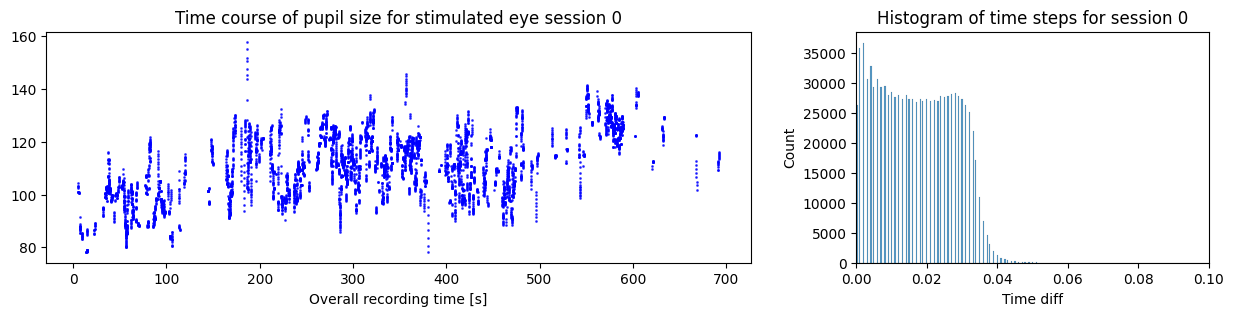

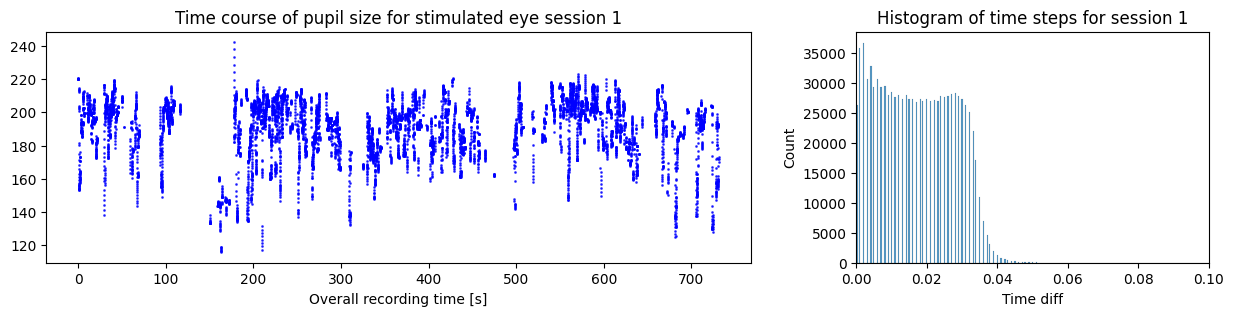

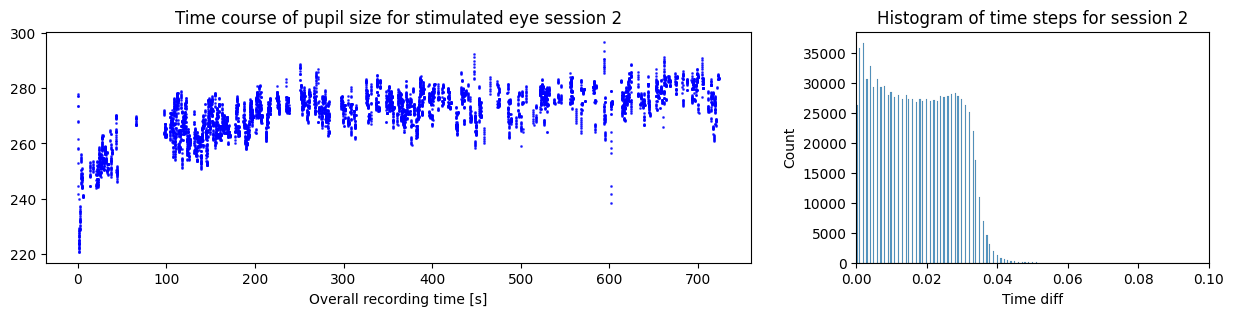

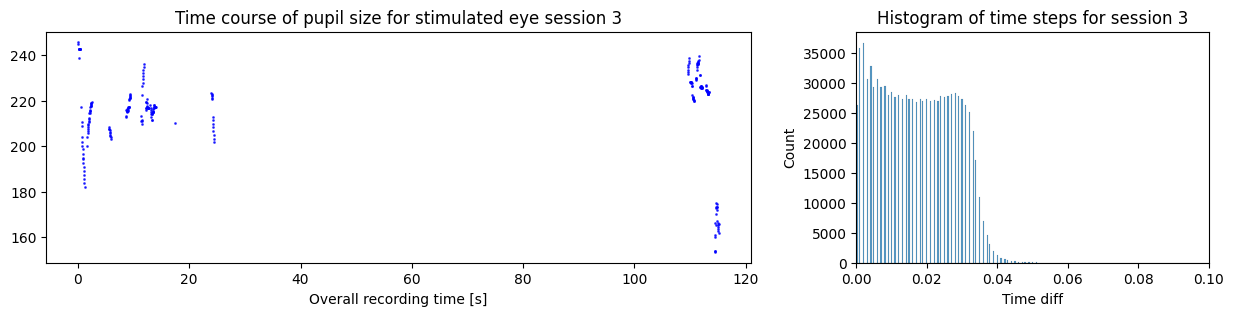

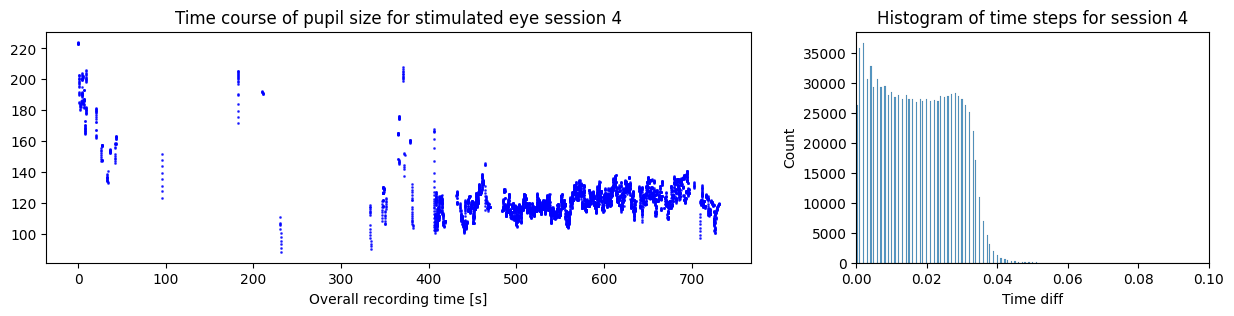

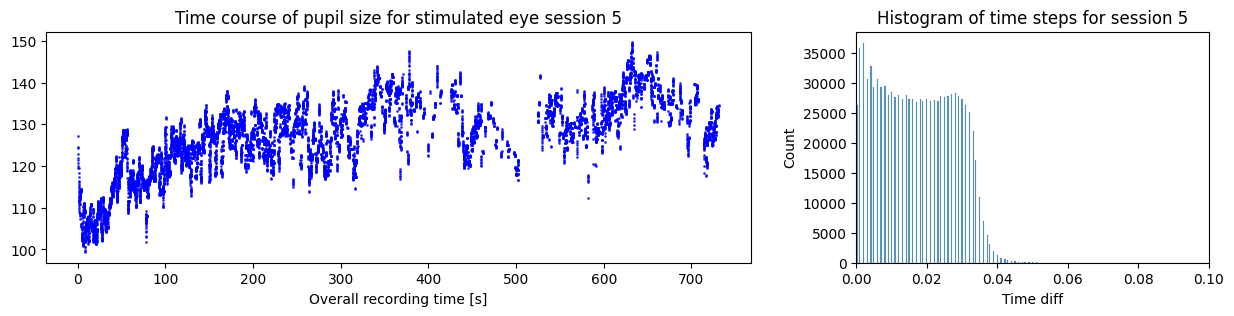

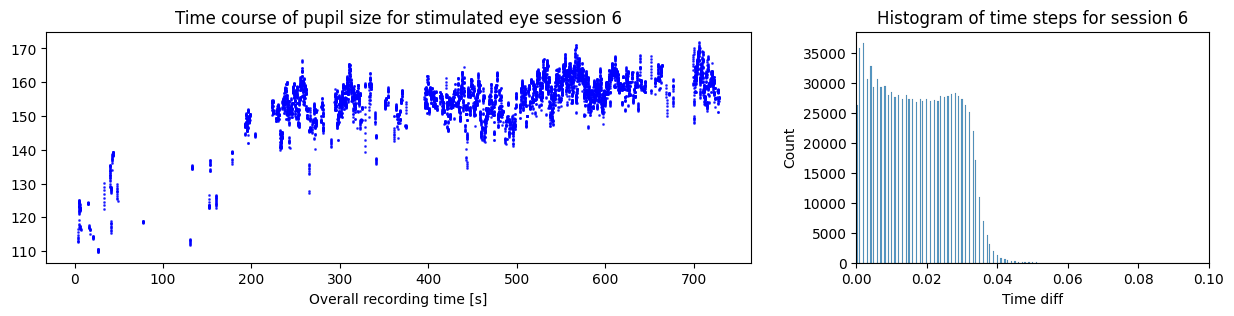

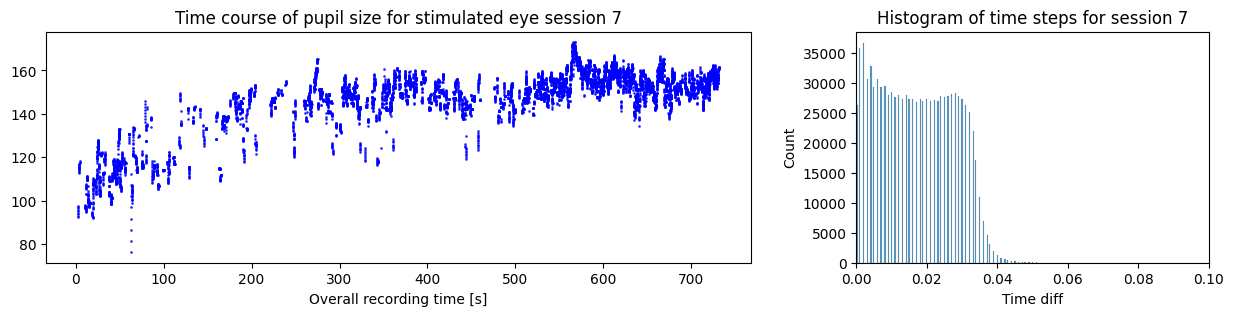

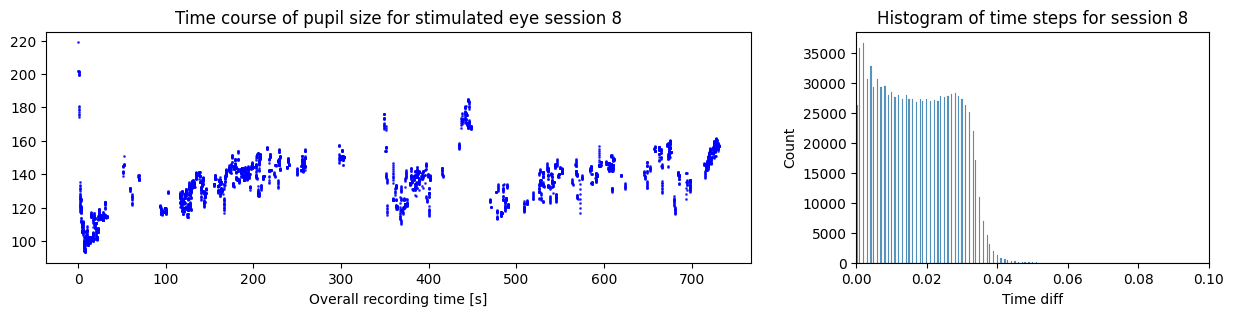

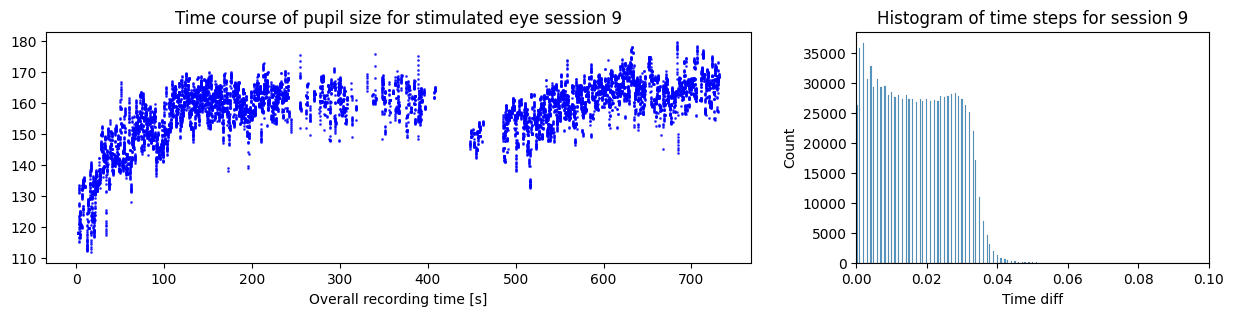

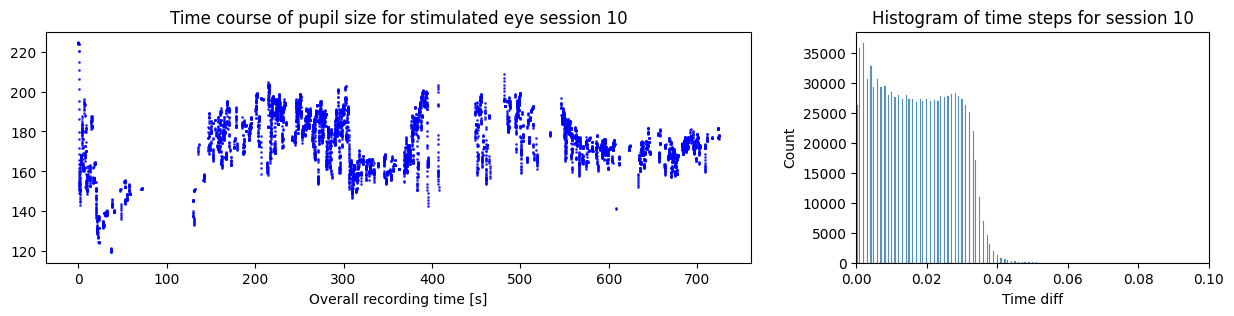

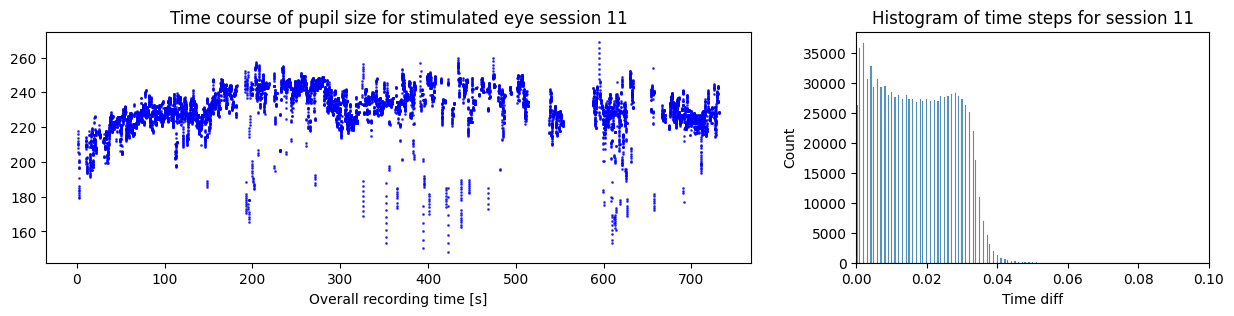

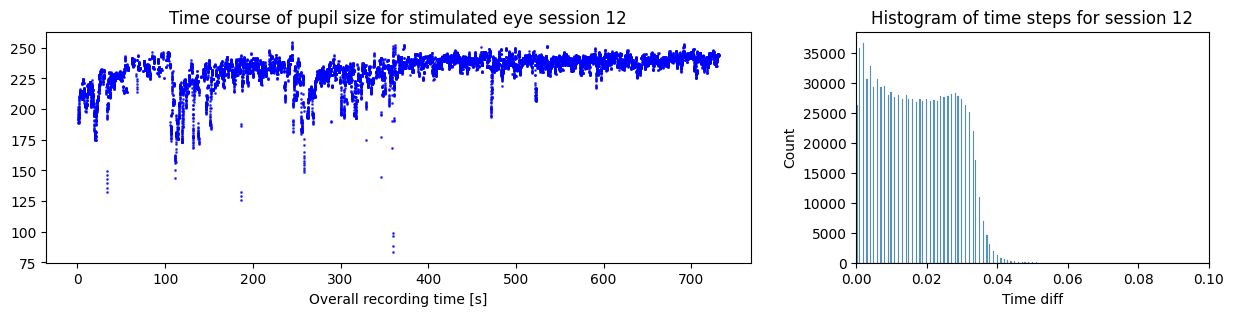

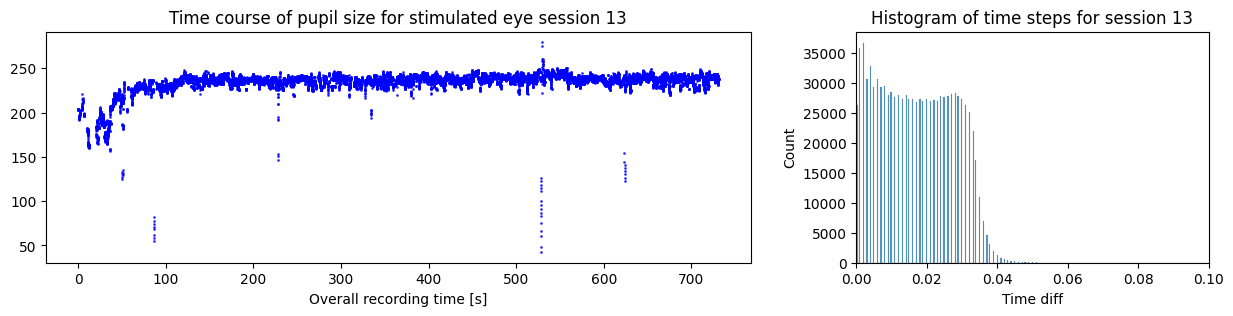

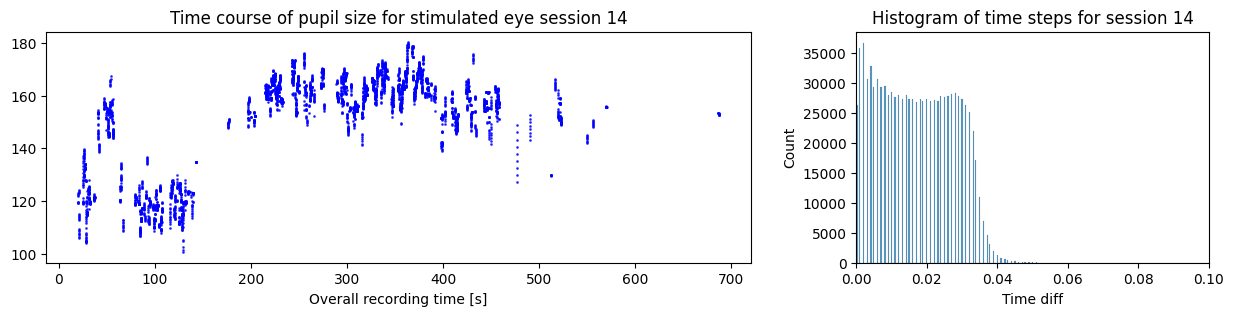

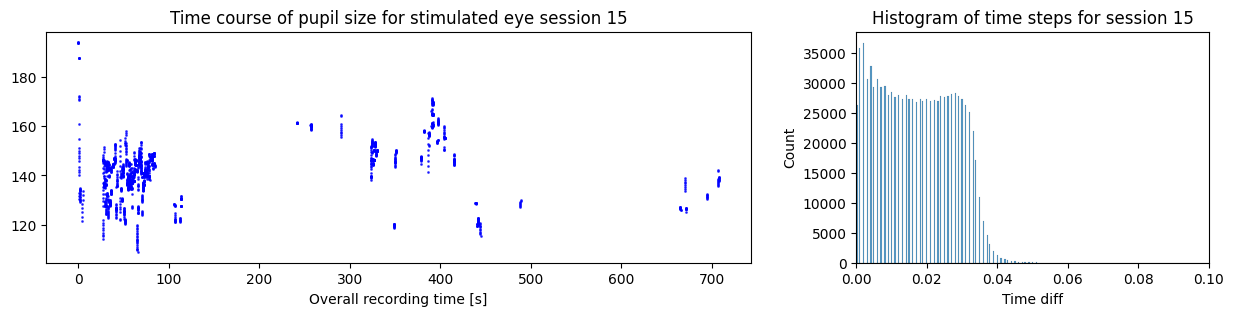

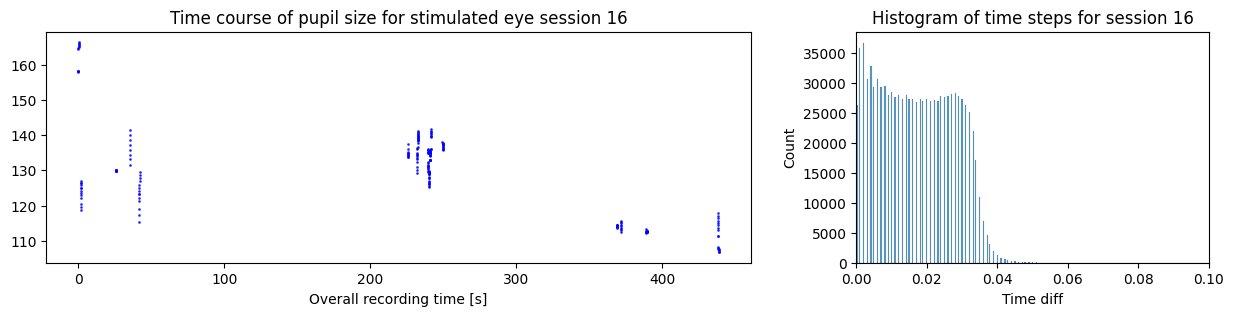

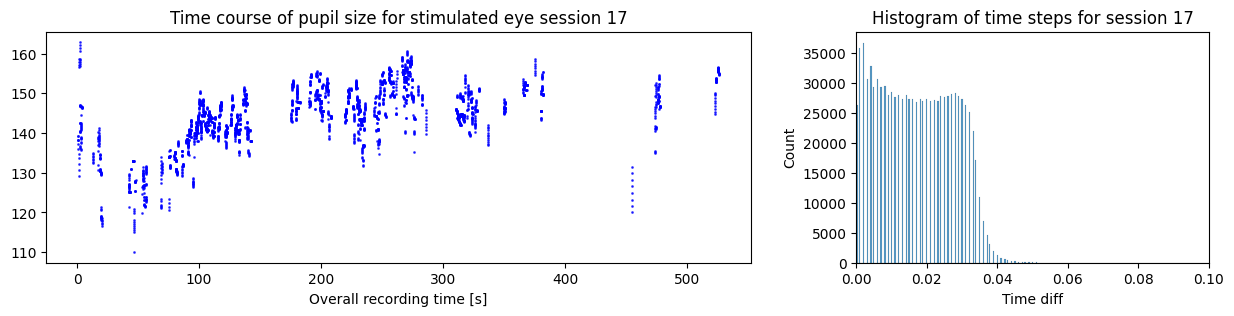

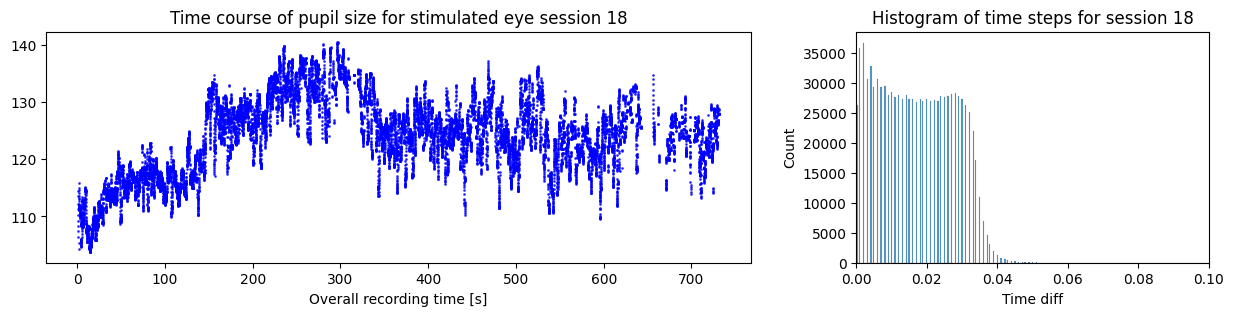

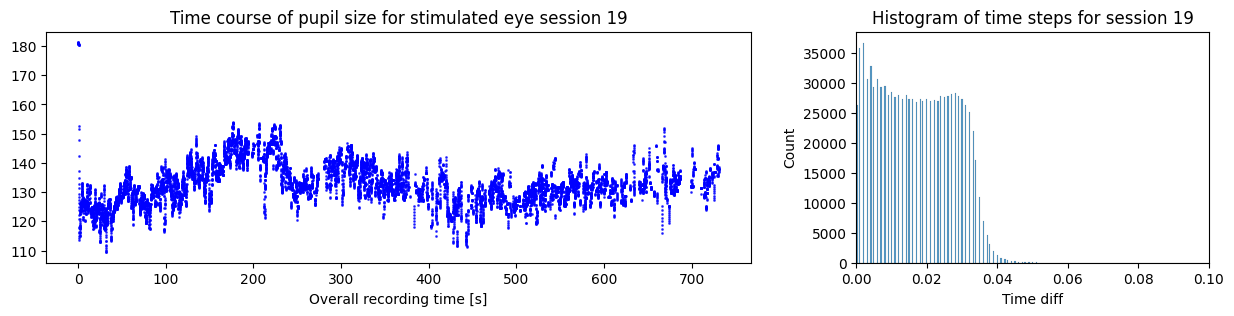

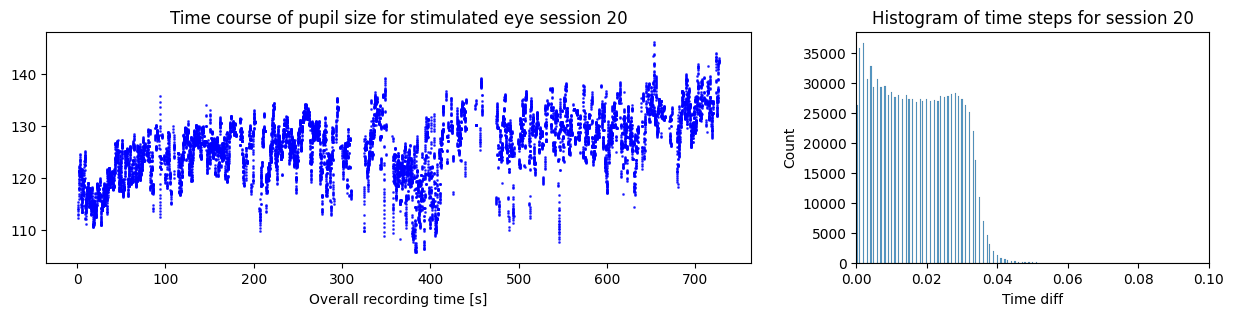

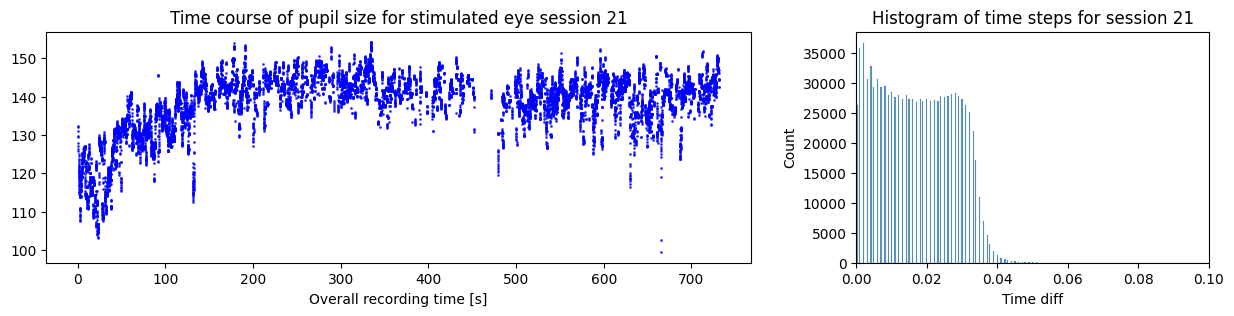

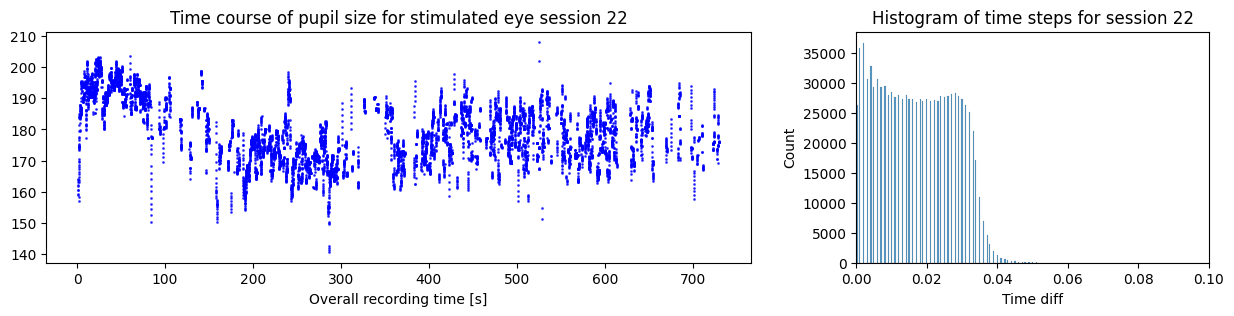

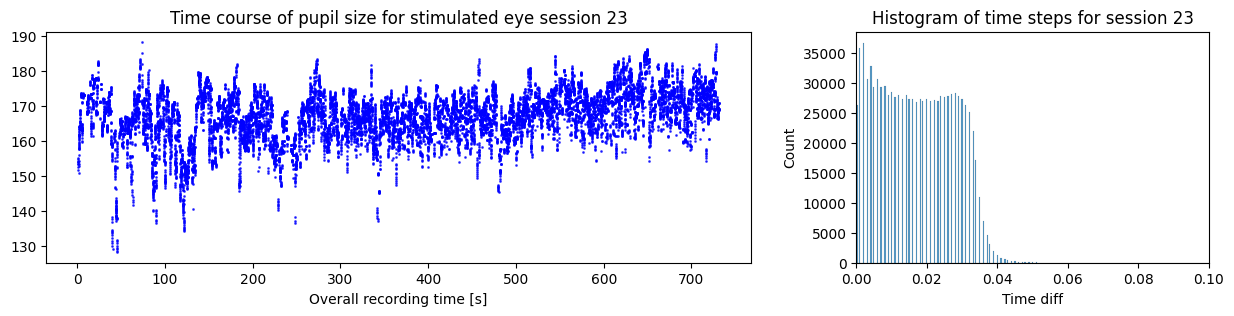

In [5]:
for id in data_df['Session id'].unique():
    f,(ax1,ax2)=plt.subplots(1,2,gridspec_kw={'width_ratios': [2, 1]},figsize=(15,3))
    if data_df.loc[data_df['Session id']==id,'Eye'].values[0]=='L':
        ax1.scatter(data_df['Overall time Sec'][data_df['Session id']==id],data_df['Left - RadiusB Px'][data_df['Session id']==id],s=1,c='b',alpha=0.7)
    else:
        ax1.scatter(data_df['Overall time Sec'][data_df['Session id']==id],data_df['Right - RadiusB Px'][data_df['Session id']==id],s=1,c='b',alpha=0.7)
    ax1.set_xlabel('Overall recording time [s]')
    ax1.set_title(f'Time course of pupil size for stimulated eye session {id}')
    ax2=sns.histplot(data = data_df, x = 'Time diff')
    ax2.set_title(f'Histogram of time steps for session {id}')
    ax2.set_xlim([0,0.1])
    plt.show()

In [7]:
data_df=[]
f=[]
ax1=[]
ax2=[]
participant_id = 202
data_dir = './results'
data_path = os.path.join(data_dir,str(participant_id)+'_full_data.csv')

data_df = pd.read_csv(data_path)
data_df['Time diff'] = data_df['Overall time Sec'].diff()
data_df.loc[data_df['Time diff']<0,'Time diff'] = np.nan #to avoid a negative jump from session to session

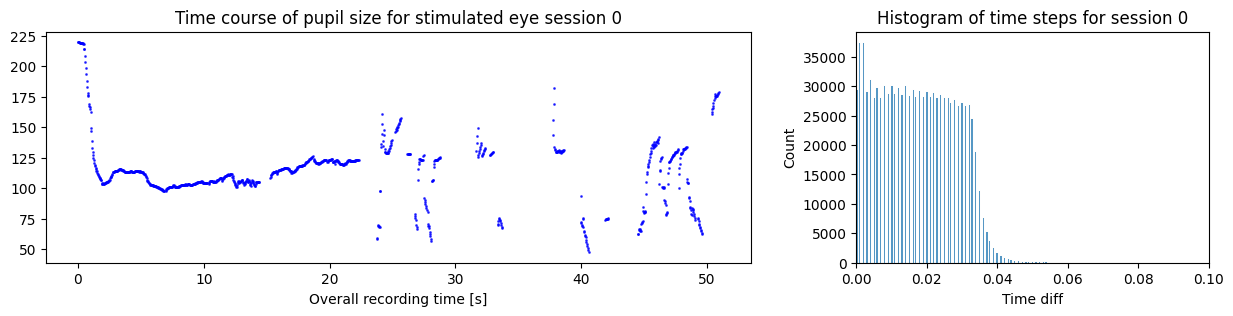

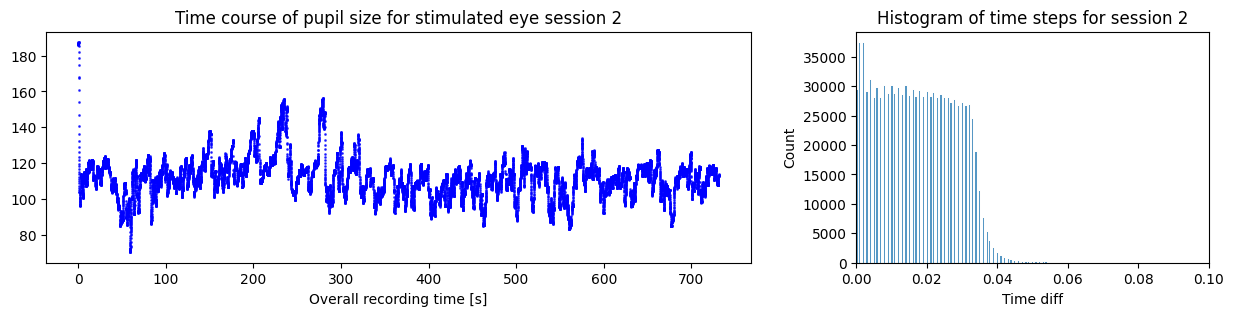

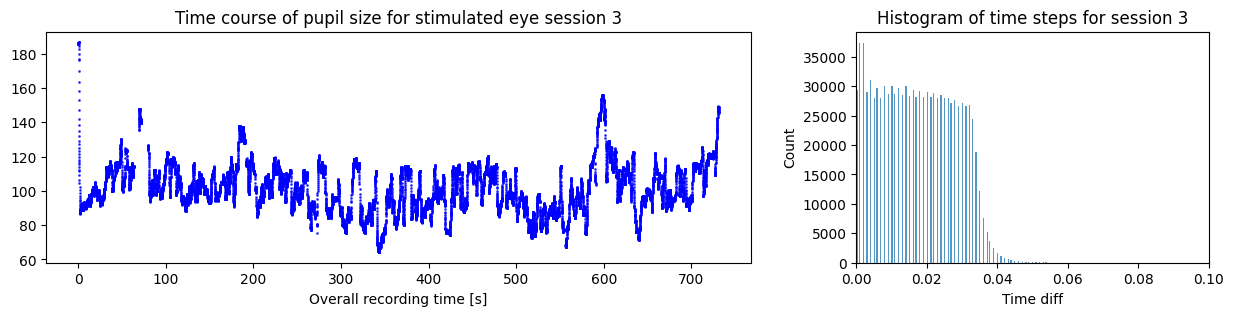

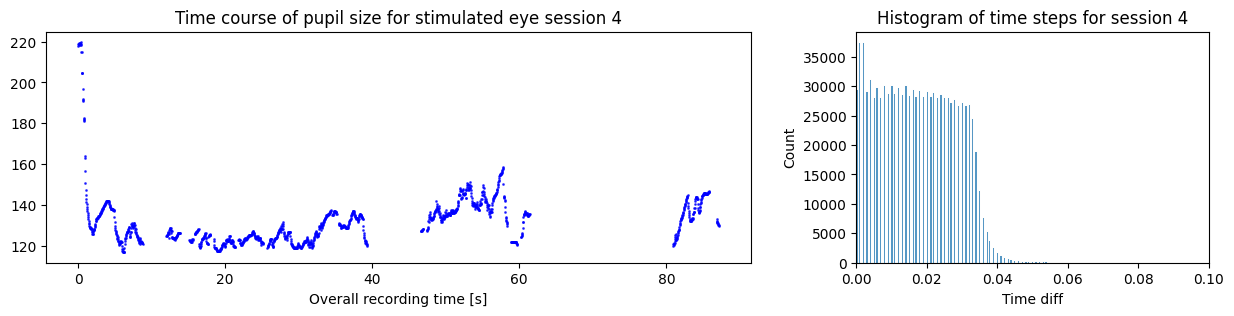

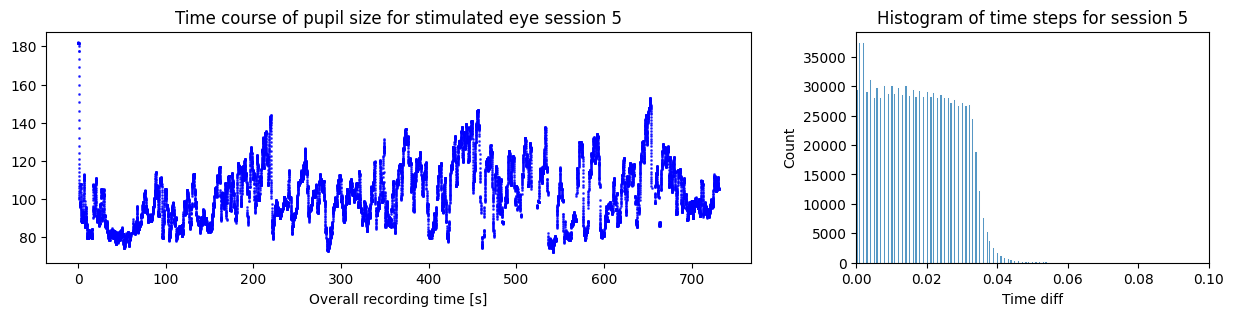

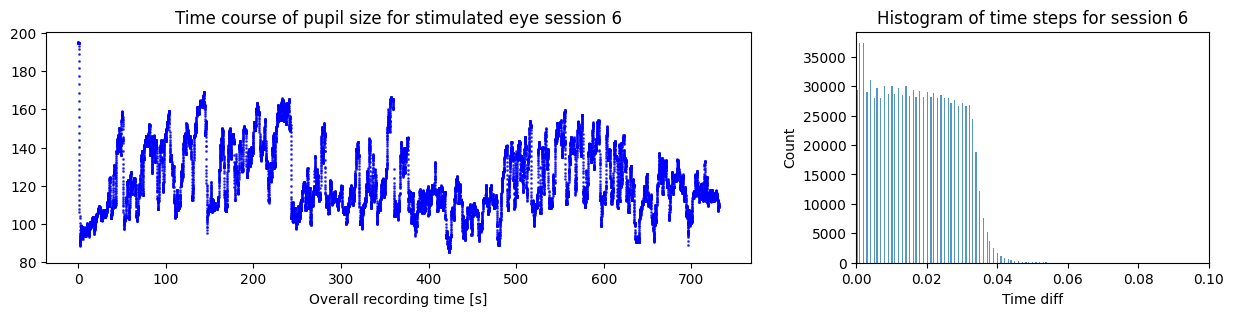

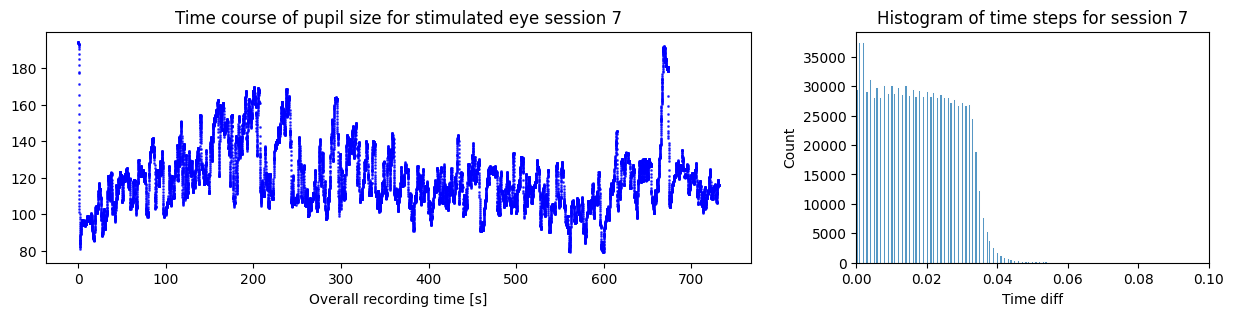

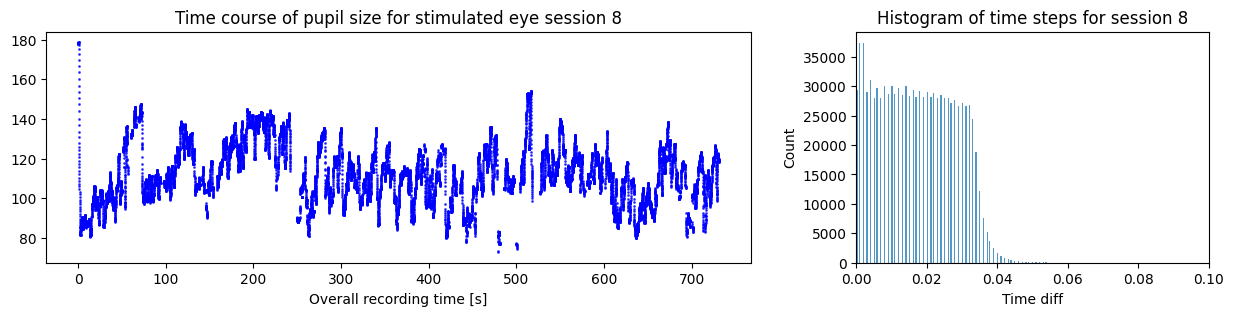

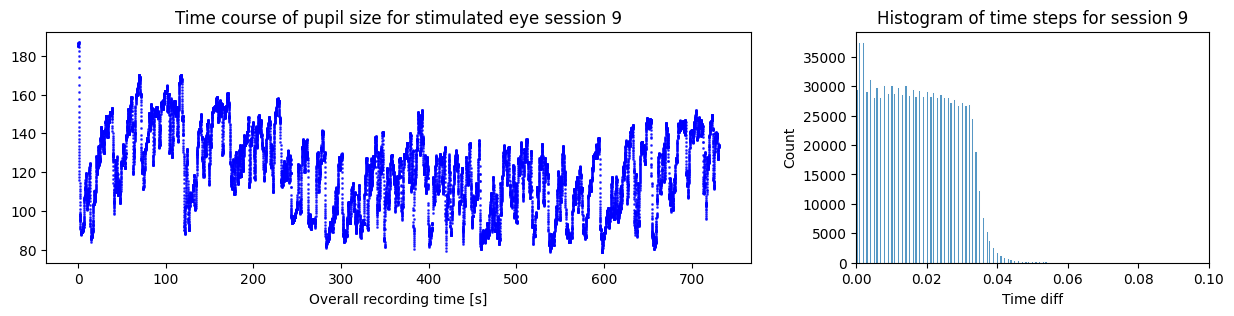

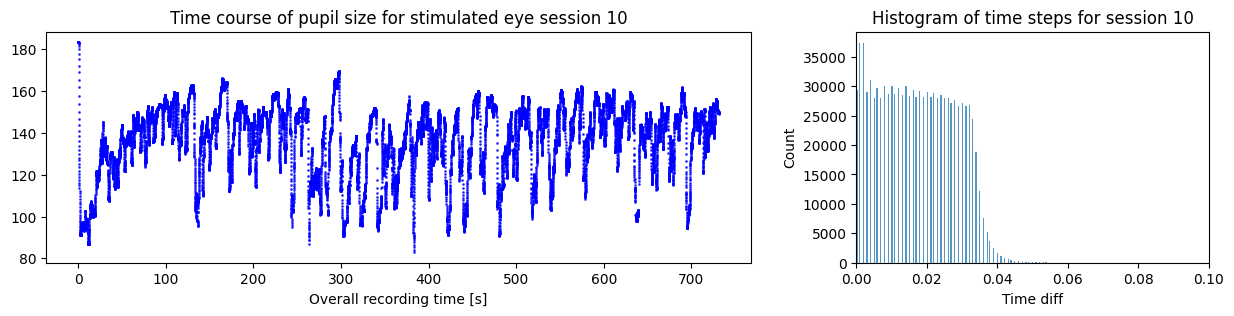

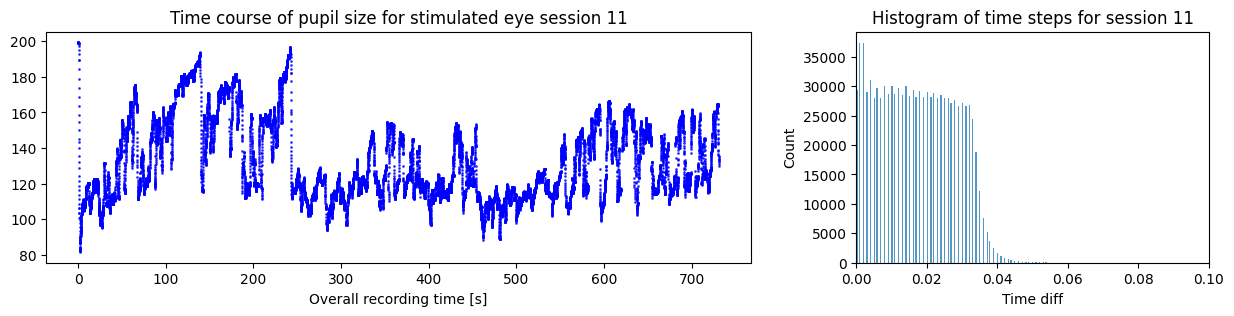

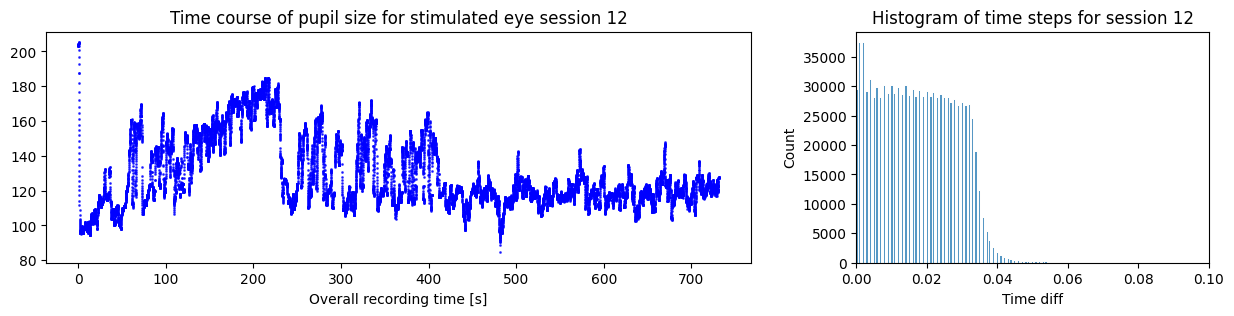

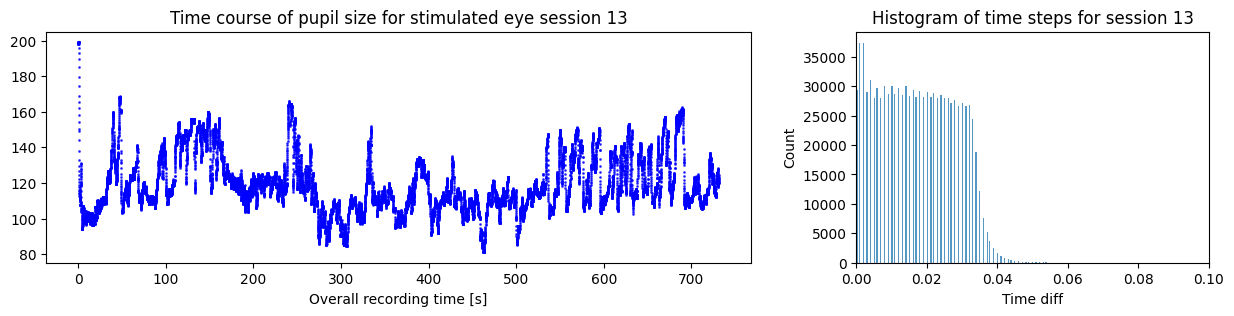

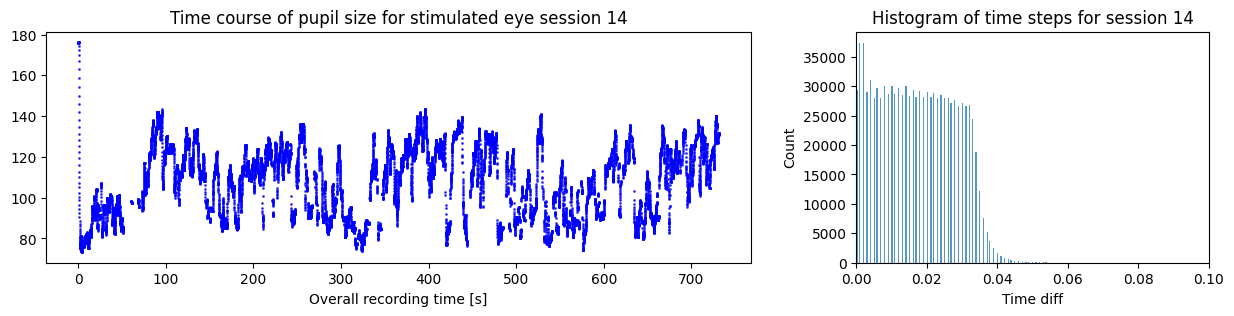

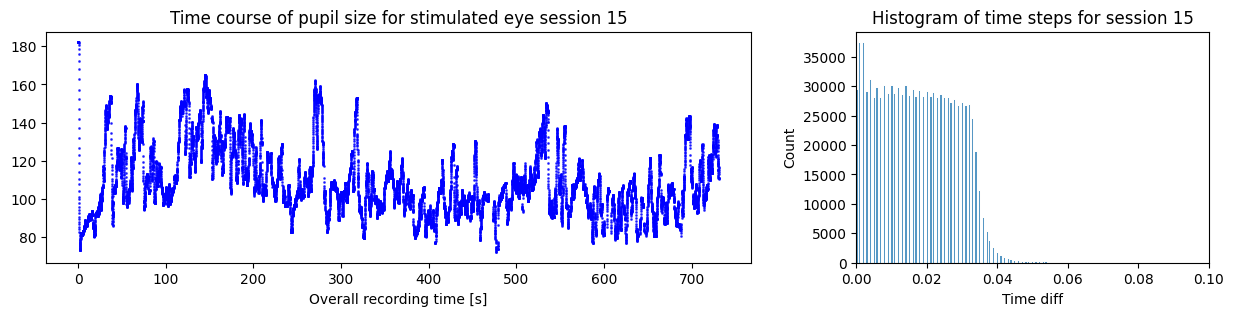

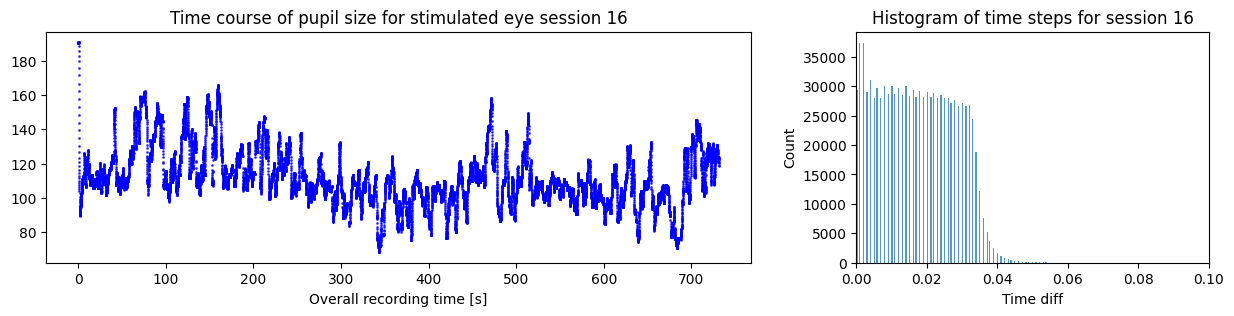

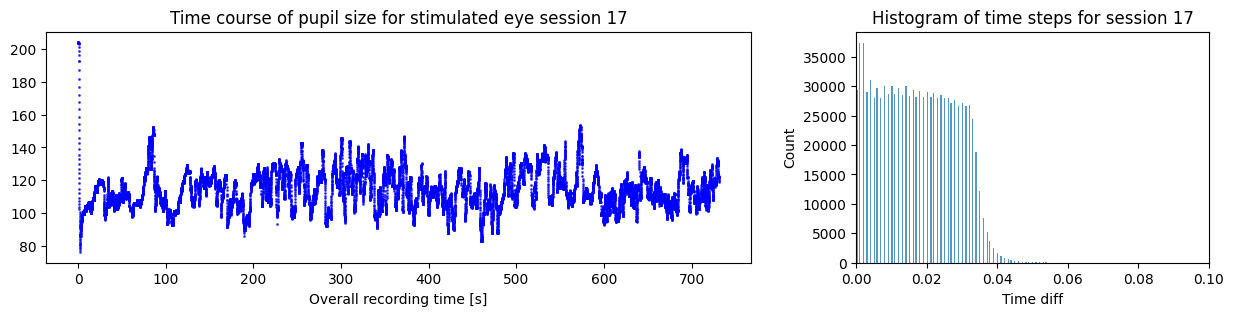

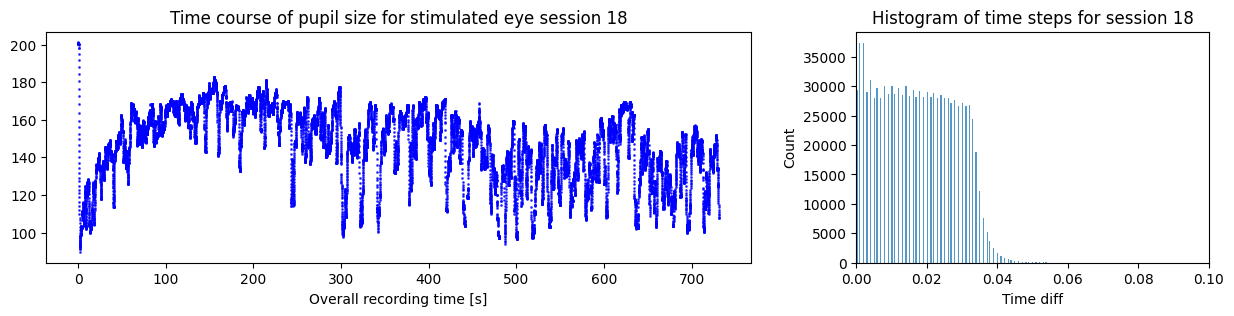

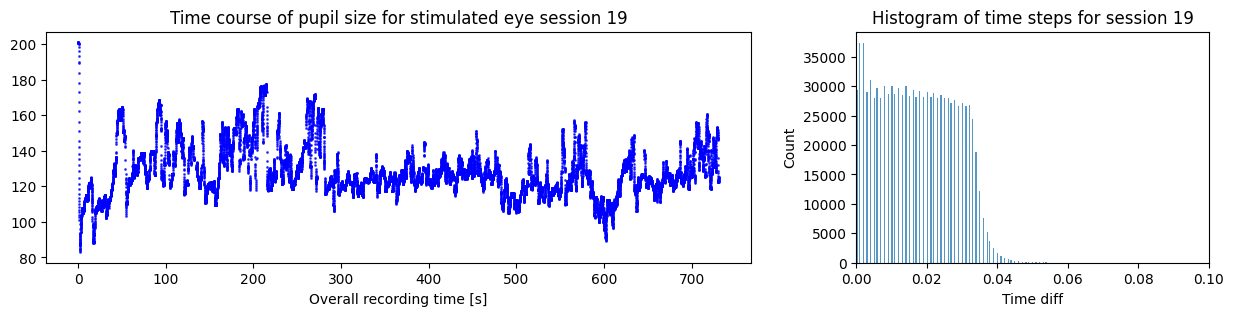

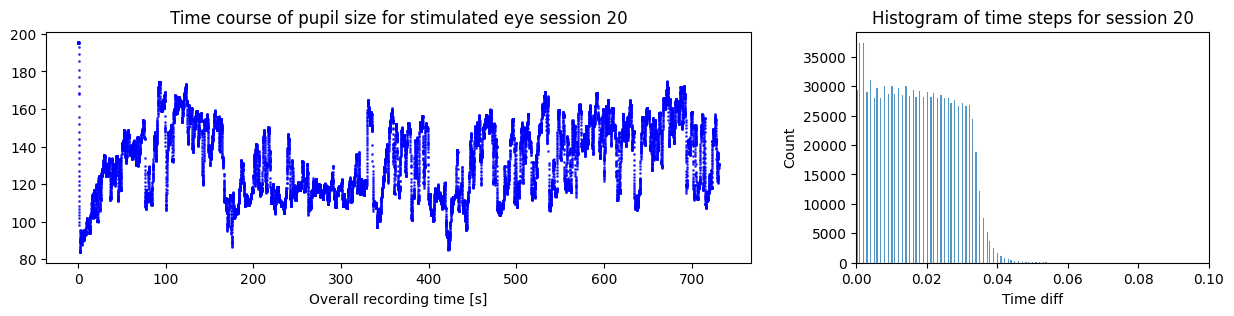

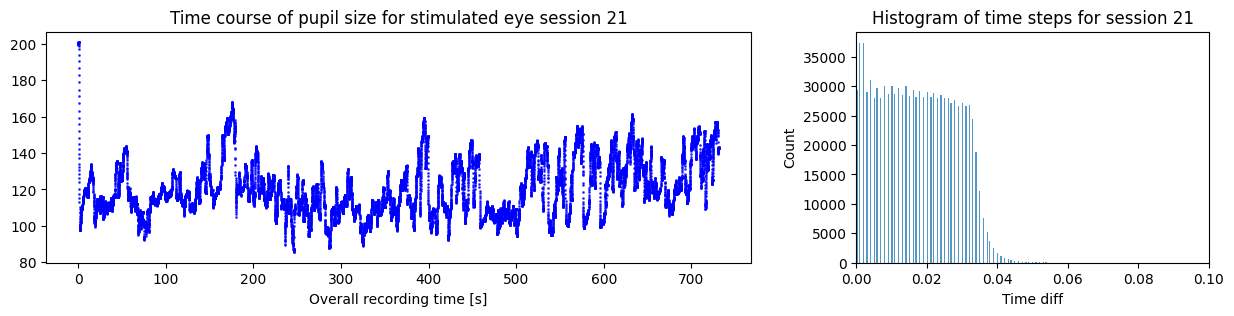

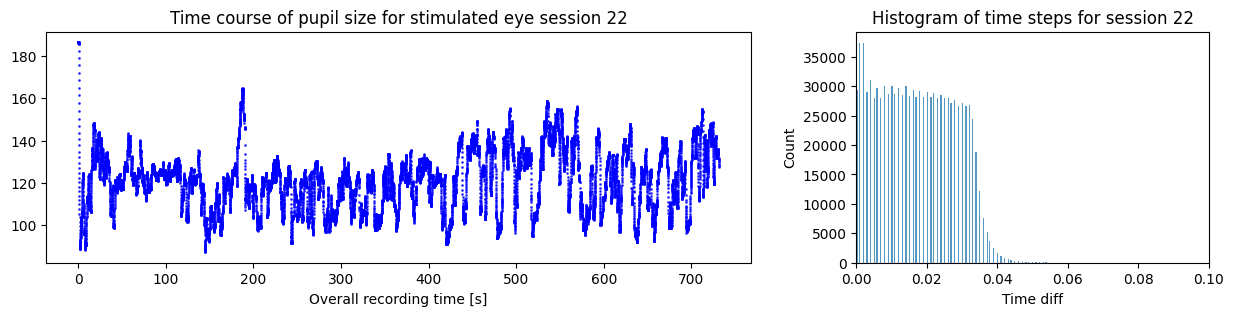

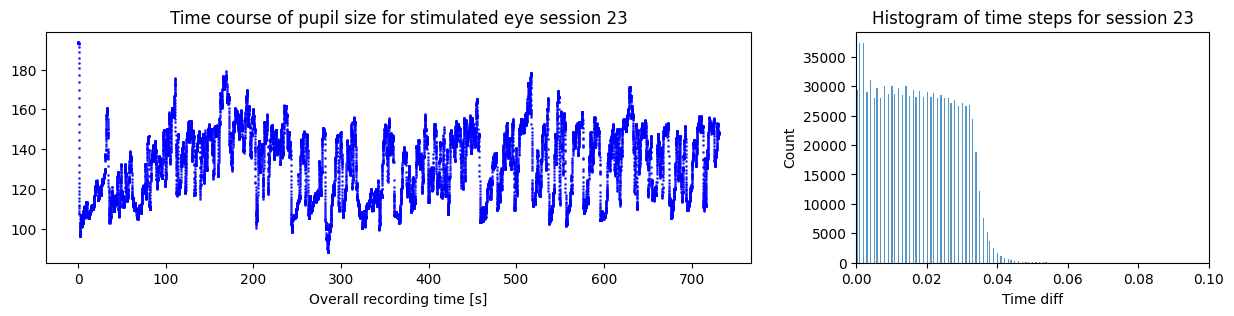

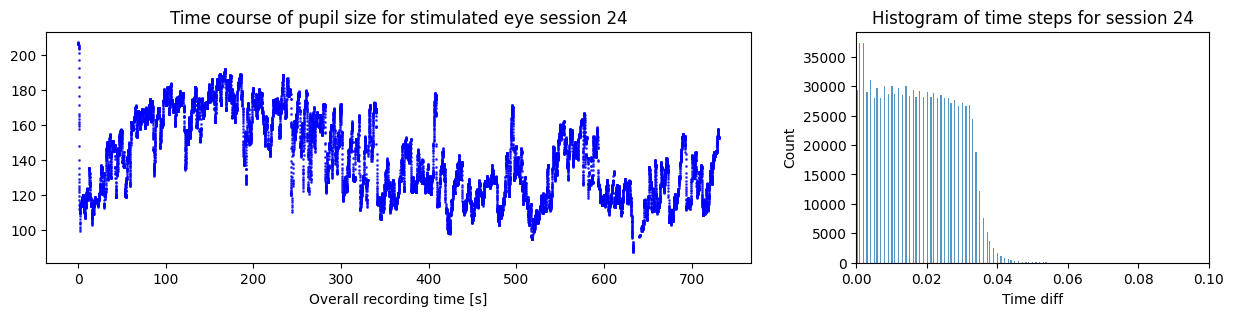

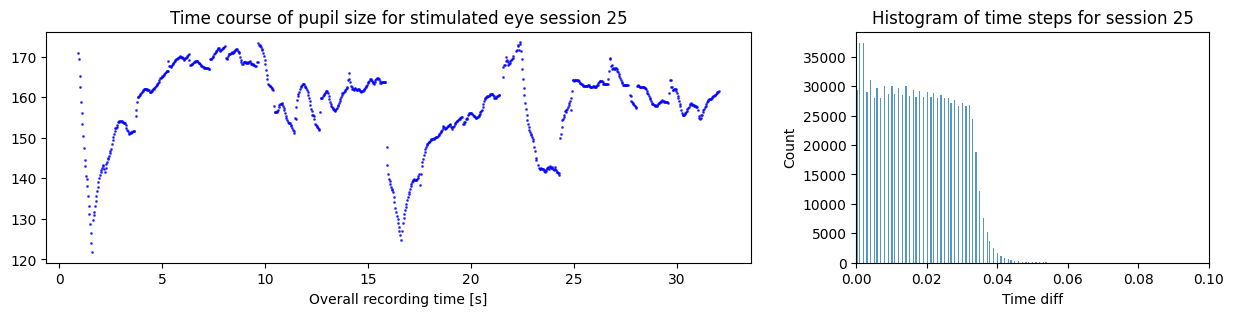

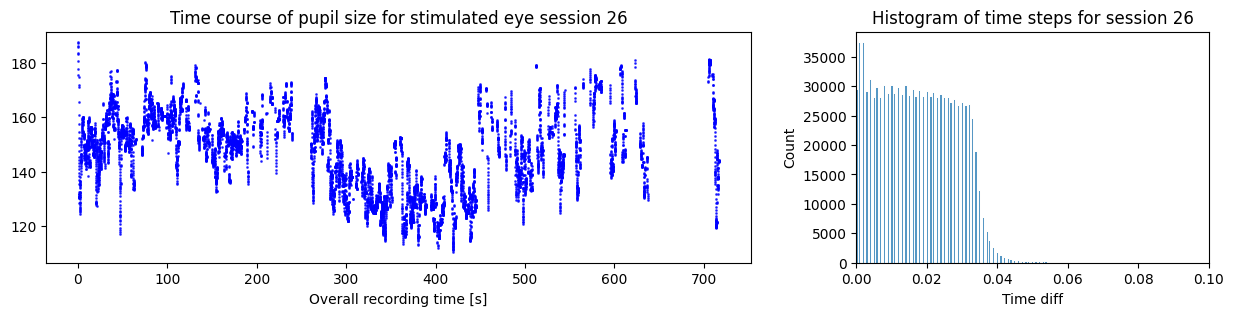

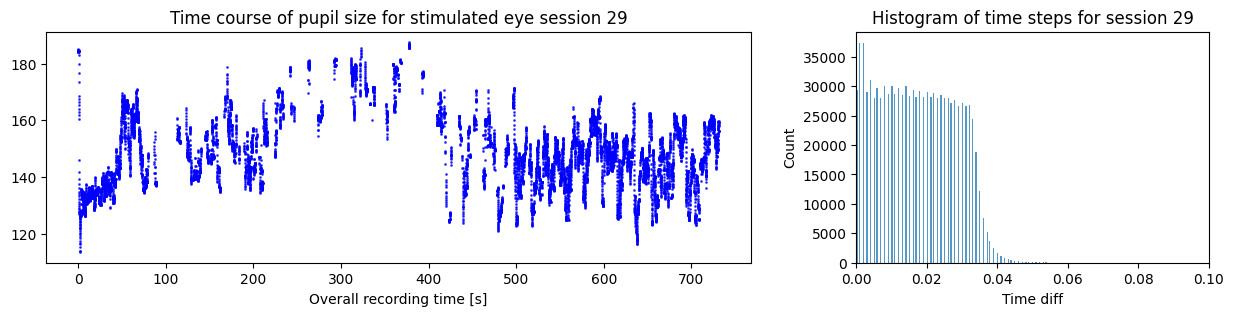

In [6]:
for id in data_df['Session id'].unique():
    f,(ax1,ax2)=plt.subplots(1,2,gridspec_kw={'width_ratios': [2, 1]},figsize=(15,3))
    if data_df.loc[data_df['Session id']==id,'Eye'].values[0]=='L':
        ax1.scatter(data_df['Overall time Sec'][data_df['Session id']==id],data_df['Left - RadiusB Px'][data_df['Session id']==id],s=1,c='b',alpha=0.7)
    else:
        ax1.scatter(data_df['Overall time Sec'][data_df['Session id']==id],data_df['Right - RadiusB Px'][data_df['Session id']==id],s=1,c='b',alpha=0.7)
    ax1.set_xlabel('Overall recording time [s]')
    ax1.set_title(f'Time course of pupil size for stimulated eye session {id}')
    ax2=sns.histplot(data = data_df, x = 'Time diff')
    ax2.set_xlim([0,0.1])
    ax2.set_title(f'Histogram of time steps for session {id}')
    plt.show()

Histograms of time steps appear to be similar between recording sessions within participants. They don't seem to change depending on quality of data.